In [ ]:
! pip install pandas

In [ ]:
! pip install matplotlib

## Preprocessing

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv("Stars_Names.csv")
data.head()

,Name,Constellation,Bayern Designation,Designation,Approval Date
0,Acamar,Eridanus,θ1 Eridani A,HR 897,2016-07-20
1,Achernar,Eridanus,α Eridani A,HR 472,2016-06-30
2,Achird,Cassiopeia,η Cassiopeiae A,HR 219,2017-09-05
3,Acrab,Scorpius,β1 Scorpii Aa,HR 5984,2016-08-21
4,Acrux,Crux,α Crucis Aa,HR 4730,2016-07-20


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                336 non-null    object
 1   Constellation       335 non-null    object
 2   Bayern Designation  335 non-null    object
 3   Designation         336 non-null    object
 4   Approval Date       336 non-null    object
dtypes: object(5)
memory usage: 13.3+ KB


In [41]:
print("Shape:", data.shape)
print("columns:", list(data.columns))

Shape: (336, 5)
columns: ['Name', 'Constellation', 'Bayern Designation', 'Designation', 'Approval Date']


### 1. *Changing DataType of Approval Date Column*


In [42]:
data['Approval Date'] = pd.to_datetime(data['Approval Date'], errors='coerce') 

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                336 non-null    object        
 1   Constellation       335 non-null    object        
 2   Bayern Designation  335 non-null    object        
 3   Designation         336 non-null    object        
 4   Approval Date       336 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 13.3+ KB


### 1. *Printing Null Values*


In [44]:
print(data.isnull().sum())

Name                  0
Constellation         1
Bayern Designation    1
Designation           0
Approval Date         0
dtype: int64


In [45]:
data.describe(include = "all")

,Name,Constellation,Bayern Designation,Designation,Approval Date
count,336,335,335,336,336
unique,336,63,335,336,NaN
top,Zubeneschamali,Ursa Major,β Librae,HR 5685,NaN
freq,1,18,1,1,NaN
mean,NaN,NaN,NaN,NaN,2016-12-05 12:38:34.285714176
min,NaN,NaN,NaN,NaN,2015-12-15 00:00:00
25%,NaN,NaN,NaN,NaN,2016-07-20 00:00:00
50%,NaN,NaN,NaN,NaN,2016-08-21 00:00:00
75%,NaN,NaN,NaN,NaN,2017-06-30 00:00:00
max,NaN,NaN,NaN,NaN,2018-08-10 00:00:00


## Questions:

### 1. Zodiac Star Distribution

In [86]:
# List of zodiac constellations
zodiac_constellations = [
    "Aries", "Taurus", "Gemini", "Cancer", "Leo", "Virgo",
    "Libra", "Scorpius", "Sagittarius", "Capricornus", "Aquarius", "Pisces"
]

# Filtering Zodiac Constellations
zodiac_data = data[data["Constellation"].isin(zodiac_constellations)]

# Star Count per Zodiac Constellation
zodiac_star_counts = zodiac_data.groupby("Constellation")["Name"].count().reset_index(name="Star Count")

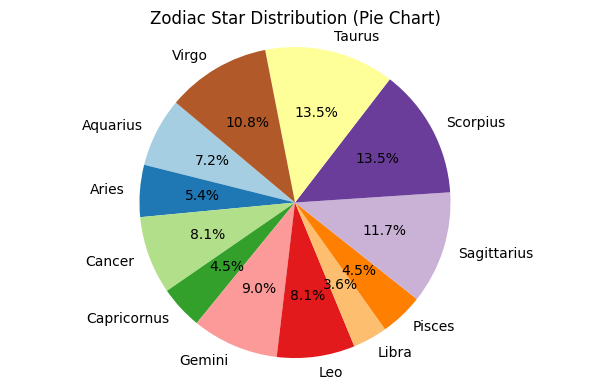

In [87]:
# Plotting Pie Chart
plt.figure(figsize=(6, 4))
plt.pie(
    zodiac_star_counts["Star Count"],
    labels=zodiac_star_counts["Constellation"],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)

plt.title("Zodiac Star Distribution (Pie Chart)")
plt.axis('equal')
plt.tight_layout()
plt.show()
